In [3]:
############## Initialisation ################

options(scipen=999)
shhh <- suppressPackageStartupMessages

shhh(library(tidyquant))
shhh(library(quantmod))
shhh(library(tibble))
shhh(library(tidyr))
shhh(library(reshape2))
shhh(library(ggplot2))

symbols <- c("F", "GE", "IBM", "UN")

In [6]:
getFin <- function(stock){
  for (i in 1:length(stock)) {
    tryCatch(
      {
        # Collect the Income Statement data
        link <- "https://finance.yahoo.com/quote/"
        link <- paste0(link, stock[i], "/financials?p=", stock[i])
        wahis.session <- html_session(link)
        p <- wahis.session %>%
          html_nodes(xpath = '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/table')%>%
          html_table(fill = TRUE)
        IncomeStatement <- p[[1]]
        colnames(IncomeStatement) <- paste(IncomeStatement[1,])
        IncomeStatement <- IncomeStatement[-c(1,5,12,20,25),]
        names_row <- paste(IncomeStatement[,1])
        IncomeStatement <- IncomeStatement[,-1]
        IncomeStatement <- apply(IncomeStatement, 2, function(x){gsub(",","",x)})
        IncomeStatement <- as.data.frame(apply(IncomeStatement, 2, as.numeric))
        rownames(IncomeStatement) <- paste(names_row)
        temp1 <- IncomeStatement
        
        # Collect the Balance Sheet data
        link <- "https://finance.yahoo.com/quote/"
        link <- paste0(link, stock[i],"/balance-sheet?p=", stock[i])
        wahis.session <- html_session(link)
        p <- wahis.session %>%
          html_nodes(xpath = '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/table')%>%
          html_table(fill = TRUE)
        BalanceSheet <- p[[1]]
        colnames(BalanceSheet) <- BalanceSheet[1,]
        BalanceSheet <- BalanceSheet[-c(1,2,17,28),]
        names_row <- BalanceSheet[,1]
        BalanceSheet <- BalanceSheet[,-1]
        BalanceSheet <- apply(BalanceSheet, 2, function(x){gsub(",","",x)})
        BalanceSheet <- as.data.frame(apply(BalanceSheet, 2, as.numeric))
        rownames(BalanceSheet) <- paste(names_row)
        temp2 <- BalanceSheet
        
        # Collect the Cash Flow data
        link <- "https://finance.yahoo.com/quote/"
        link <- paste0(link, stock[i], "/cash-flow?p=", stock[i])
        wahis.session <- html_session(link)
        p <- wahis.session %>%
          html_nodes(xpath = '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/table')%>%
          html_table(fill = TRUE)
        CashFlow <- p[[1]]
        colnames(CashFlow) <- CashFlow[1,]
        CashFlow <- CashFlow[-c(1,3,11,16),]
        names_row <- CashFlow[,1]
        CashFlow <- CashFlow[,-1]
        CashFlow <- apply(CashFlow, 2, function(x){gsub(",","",x)})
        CashFlow <- as.data.frame(apply(CashFlow, 2, as.numeric))
        rownames(CashFlow) <- paste(names_row)
        temp3 <- CashFlow
        
        assign(paste0(stock[i],'.f'),value = list(IncomeStatement = temp1, BalanceSheet = temp2, CashFlow = temp3), envir = parent.frame())
        },
      error = function(cond){
        message(stock[i], "Give error ",cond)
        }
      )
  }
}

symbols.f <- sapply(symbols, function(x) { paste0(x, ".f") })

tickers <- list2env(mget(symbols.f))

IS <- lapply(tickers, "[[", "IncomeStatement")
BS <- lapply(tickers, "[[", "BalanceSheet")
CF <- lapply(tickers, "[[", "CashFlow")

IS <- as.data.frame(IS)
BS <- as.data.frame(BS)
CF <- as.data.frame(CF)

head(IS)
head(BS)
head(CF)

,UN.f.12.31.2018,UN.f.12.31.2017,UN.f.12.31.2016,UN.f.12.31.2015,IBM.f.12.31.2018,IBM.f.12.31.2017,IBM.f.12.31.2016,IBM.f.12.31.2015,GE.f.12.31.2018,GE.f.12.31.2017,GE.f.12.31.2016,GE.f.12.31.2015,F.f.12.31.2018,F.f.12.31.2017,F.f.12.31.2016,F.f.12.31.2015
Total Revenue,50982000,53715000,52713000,53272000,79591000,79139000,79919000,81741000,121615000,118243000,119468000,115834000,160338000,156776000,151800000,149558000
Cost of Revenue,28769000,30547000,30229000,30808000,42655000,42196000,41402000,41057000,98396000,106858000,94886000,90111000,145459000,140218000,134933000,131410000
Gross Profit,22213000,23168000,22484000,22464000,36936000,36943000,38517000,40684000,23219000,11385000,24582000,25723000,14879000,16558000,16867000,18148000
Research Development,900000,900000,978000,1005000,5379000,5590000,5726000,5247000,NA,NA,NA,NA,NA,NA,NA,NA
Selling General and Administrative,8803000,13507000,13799000,14065000,20325000,20900000,20225000,19589000,15134000,15389000,14707000,16327000,10460000,9676000,12504000,10097000
Non Recurring,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,UN.f.12.31.2018,UN.f.12.31.2017,UN.f.12.31.2016,UN.f.12.31.2015,IBM.f.12.31.2018,IBM.f.12.31.2017,IBM.f.12.31.2016,IBM.f.12.31.2015,GE.f.12.31.2018,GE.f.12.31.2017,GE.f.12.31.2016,GE.f.12.31.2015,F.f.12.31.2018,F.f.12.31.2017,F.f.12.31.2016,F.f.12.31.2015
Cash And Cash Equivalents,3230000,3317000,3382000,2302000,11379000,11972000,7826000,7686000,16369000,18211000,10525000,10372000,7111000,8934000,7828000,5386000
Short Term Investments,681000,521000,565000,596000,618000,608000,701000,508000,NA,NA,NA,NA,15925000,17554000,19642000,18181000
Net Receivables,4822000,4204000,3854000,3416000,8596000,10380000,10239000,9534000,19874000,24209000,24076000,43013000,3698000,10599000,11102000,11042000
Inventory,4301000,3962000,4278000,4335000,1682000,1583000,1553000,1551000,19271000,19419000,22354000,22515000,11220000,11176000,8898000,8319000
Other Current Assets,1387000,4356000,1120000,1352000,2902000,2266000,532000,293000,7441000,6720000,3885000,5109000,2567000,3649000,3145000,2704000
Total Current Assets,15481000,16983000,13884000,12686000,49146000,49735000,43889000,42504000,95974000,116253000,131436000,280896000,114649000,116801000,108461000,102587000


,UN.f.12.31.2018,UN.f.12.31.2017,UN.f.12.31.2016,UN.f.12.31.2015,IBM.f.12.31.2018,IBM.f.12.31.2017,IBM.f.12.31.2016,IBM.f.12.31.2015,GE.f.12.31.2018,GE.f.12.31.2017,GE.f.12.31.2016,GE.f.12.31.2015,F.f.12.31.2018,F.f.12.31.2017,F.f.12.31.2016,F.f.12.31.2015
Net Income,9389000,6053000,5184000,4909000,8728000,5753000,11872000,13190000,-22355000,-8484000,7500000,-6126000,3677000,7731000,4589000,7373000
Depreciation,1450000,1214000,1464000,1370000,4480000,4541000,4381000,3855000,7796000,7429000,7070000,6509000,8308000,8453000,8717000,7966000
Adjustments To Net Income,-3590000,-231000,348000,331000,1485000,-383000,-526000,2406000,18532000,9305000,-14391000,21411000,-677000,-910000,3607000,-2153000
Changes In Accounts Receivables,-1298000,-506000,142000,2000,1006000,1297000,712000,812000,-430000,-2846000,1460000,-52000,-2239000,-2297000,-2855000,-3563000
Changes In Liabilities,976000,542000,-281000,847000,126000,47000,197000,81000,1697000,1343000,2953000,-1537000,6781000,6089000,6595000,7758000
Changes In Inventories,-471000,-104000,190000,-129000,-127000,18000,-14000,133000,-902000,1183000,-815000,-314000,-828000,-970000,-803000,-1155000


In [7]:
############# Combine and clean the data ###############

ISBSCF <- rbind(IS, BS, CF)

ISBSCF <- ISBSCF %>%
  t() %>%
  data.frame() %>%
  rownames_to_column('rn') %>%
  separate(rn, into = c("symbol", "year"),
           sep = -4, convert = TRUE)


ISBSCF$symbol <- gsub("(f).*", "", ISBSCF$symbol)
ISBSCF$symbol <- gsub('.$', '', ISBSCF$symbol)
ISBSCF$symbol <- gsub('^X', '', ISBSCF$symbol)

head(ISBSCF)

symbol,year,Total.Revenue,Cost.of.Revenue,Gross.Profit,Research.Development,Selling.General.and.Administrative,Non.Recurring,Others,Total.Operating.Expenses,...,Investments,Other.Cash.flows.from.Investing.Activities,Total.Cash.Flows.From.Investing.Activities,Dividends.Paid,Sale.Purchase.of.Stock,Net.Borrowings,Other.Cash.Flows.from.Financing.Activities,Total.Cash.Flows.From.Financing.Activities,Effect.Of.Exchange.Rate.Changes,Change.In.Cash.and.Cash.Equivalents
UN,2018,50982000,28769000,22213000,900000,8803000,NA,41427000,38472000,...,47000,264000,4644000,-4066000,NA,-35000,-1170000,-11548000,72000,-79000
UN,2017,53715000,30547000,23168000,900000,13507000,NA,44031000,44954000,...,-215000,292000,-5879000,-3916000,NA,8928000,-1227000,-1433000,-9000,-29000
UN,2016,52713000,30229000,22484000,978000,13799000,NA,44031000,45006000,...,100000,291000,-3188000,-3609000,NA,1771000,-978000,-3073000,284000,1070000
UN,2015,53272000,30808000,22464000,1005000,14065000,NA,44031000,45878000,...,-62000,295000,-3539000,-3331000,NA,1527000,-952000,-3032000,-541000,218000
IBM,2018,79591000,42655000,36936000,5379000,20325000,NA,-998000,67361000,...,-554000,-1000,-4913000,-5666000,NA,-301000,112000,-10469000,-495000,-630000
IBM,2017,79139000,42196000,36943000,5590000,20900000,NA,-1445000,67241000,...,-1039000,-1000,-7081000,-5506000,NA,3447000,174000,-6418000,937000,4161000


In [8]:
########## Create the Cash Cycle Calculations #############

#Set CashCycle data.frame up
CashCycle <- data.frame(matrix("", nrow = nrow(ISBSCF)))
CashCycle[,1] <- NULL
CashCycle$Ticker <- ISBSCF$symbol
CashCycle$Date <- ISBSCF$year

#CashCycle excluding accured expense Calculations
CashCycle$CollectionPeriod <- (ISBSCF$Net.Receivables / ISBSCF$Total.Revenue) * 365
CashCycle$DaysofInventory <- (ISBSCF$Inventory / ISBSCF$Cost.of.Revenue) * 365
CashCycle$DaysofPayable <- (ISBSCF$Accounts.Payable / ISBSCF$Cost.of.Revenue) * 365
CashCycle$CashCollectionCycle <- CashCycle$CollectionPeriod + CashCycle$DaysofInventory - CashCycle$DaysofPayable
#CashCycle including accured expense Calculations
CashCycle$DaysofPayableAccExp <- ((ISBSCF$Accounts.Payable + ISBSCF$Total.Current.Liabilities) / ISBSCF$Cost.of.Revenue) * 365
CashCycle$CashCollectionCycleAccExp <- CashCycle$CollectionPeriod + CashCycle$DaysofInventory - CashCycle$DaysofPayableAccExp

CashCycle <- CashCycle[Reduce(`&`, lapply(CashCycle, function(x) !is.nan(x)  & !is.infinite(x))),]

head(CashCycle)

Ticker,Date,CollectionPeriod,DaysofInventory,DaysofPayable,CashCollectionCycle,DaysofPayableAccExp,CashCollectionCycleAccExp
UN,2018,34.52258,54.56794,115.72057,-26.630053,366.5732,-277.4827
UN,2017,28.56669,47.34115,98.18329,-22.275450,375.1206,-299.2128
UN,2016,26.68621,51.65470,103.73201,-25.391103,351.9354,-273.5945
UN,2015,23.40517,51.35922,98.28746,-23.523067,335.4640,-260.6996
IBM,2018,39.42079,14.39292,56.11699,-2.303276,383.2265,-329.4128
IBM,2017,47.87399,13.69312,55.80185,5.765263,378.9959,-317.4288


In [9]:
########## Create the DuPont Calculations #############

#DuPont Analysis
#Set CashCycle data.frame up
DuPontAnalysis <- data.frame(matrix("", nrow = nrow(ISBSCF)))
DuPontAnalysis[,1] <- NULL
DuPontAnalysis$Ticker <- ISBSCF$symbol
DuPontAnalysis$Date <- ISBSCF$year
#DuPont Analysis Calculations
DuPontAnalysis$ROE <- ISBSCF$Net.Income / ISBSCF$Total.stockholders..equity
DuPontAnalysis$ROS <- ISBSCF$Net.Income / ISBSCF$Total.Revenue
DuPontAnalysis$Turnover <- ISBSCF$Total.Revenue / ISBSCF$Total.Assets
DuPontAnalysis$Leverage <- ISBSCF$Total.Assets / ISBSCF$Total.stockholders..equity

DuPontAnalysis <- DuPontAnalysis[Reduce(`&`, lapply(DuPontAnalysis, function(x) !is.nan(x)  & !is.infinite(x))),]

head(DuPontAnalysis)

Ticker,Date,ROE,ROS,Turnover,Leverage
UN,2018,0.8113550,0.18416304,0.8574744,5.137919
UN,2017,0.4441265,0.11268733,0.8910177,4.423289
UN,2016,0.3169867,0.09834386,0.9341473,3.450471
UN,2015,0.3179610,0.09214972,1.0186240,3.387396
IBM,2018,0.5196475,0.10966064,0.6450779,7.345916
IBM,2017,0.3269865,0.07269488,0.6313140,7.124929


In [11]:
########## Create the NFO & WC Calculations #############

#NFO-WC Analysis
NFO_WCAnalysis <- data.frame(matrix("", nrow = nrow(ISBSCF)))
NFO_WCAnalysis[,1] <- NULL
NFO_WCAnalysis$Ticker <- ISBSCF$symbol
NFO_WCAnalysis$Date <- ISBSCF$year
#NFO_WC Analysis Calculations
NFO_WCAnalysis$REC <- ISBSCF$Net.Receivables
NFO_WCAnalysis$INV <- ISBSCF$Inventory
NFO_WCAnalysis$OtherCurrentAssetsNotCash <- ISBSCF$Other.Current.Assets
NFO_WCAnalysis$Payables <- ISBSCF$Accounts.Payable
NFO_WCAnalysis$SpontaneousFunsIncDeftaxes <- ISBSCF$Total.Current.Liabilities + ISBSCF$Other.Current.Liabilities + ISBSCF$Income.Tax.Expense

####
NFO_WCAnalysis$NFO <- NFO_WCAnalysis$REC + NFO_WCAnalysis$INV + NFO_WCAnalysis$OtherCurrentAssetsNotCash - NFO_WCAnalysis$Payables - NFO_WCAnalysis$SpontaneousFunsIncDeftaxes
NFO_WCAnalysis$LTD <- ISBSCF$Long.Term.Debt
NFO_WCAnalysis$EQ <- ISBSCF$Total.stockholders..equity
NFO_WCAnalysis$OtherLongTermLiabilities <- ISBSCF$Minority.Interest + ISBSCF$Other.Liabilities
NFO_WCAnalysis$FA <- ISBSCF$Total.Assets - ISBSCF$Total.Current.Assets

###
NFO_WCAnalysis$WC <- NFO_WCAnalysis$LTD + NFO_WCAnalysis$EQ + NFO_WCAnalysis$OtherLongTermLiabilities - NFO_WCAnalysis$FA
NFO_WCAnalysis$CreditPlusCashMinus <- NFO_WCAnalysis$NFO - NFO_WCAnalysis$WC

NFO_WCAnalysis <- NFO_WCAnalysis[Reduce(`&`, lapply(NFO_WCAnalysis, function(x) !is.nan(x)  & !is.infinite(x))),]

head(NFO_WCAnalysis)

Ticker,Date,REC,INV,OtherCurrentAssetsNotCash,Payables,SpontaneousFunsIncDeftaxes,NFO,LTD,EQ,OtherLongTermLiabilities,FA,WC,CreditPlusCashMinus
UN,2018,4822000,4301000,1387000,9121000,25541000,-24152000,21535000,11572000,6462000,43975000,-4406000,-19746000
UN,2017,4204000,3962000,4356000,8217000,27631000,-23326000,16342000,13629000,7017000,43302000,-6314000,-17012000
UN,2016,3854000,4278000,1120000,8591000,24870000,-24209000,11011000,16354000,8374000,42545000,-6806000,-17403000
UN,2015,3416000,4335000,1352000,8296000,24739000,-23932000,9696000,15439000,6986000,39612000,-7491000,-16441000
IBM,2018,8596000,1682000,2902000,6558000,55526000,-48904000,35681000,16796000,32678000,74236000,10919000,-59823000
IBM,2017,10380000,1583000,2266000,6451000,59456000,-51678000,39871000,17594000,30528000,75621000,12372000,-64050000


$UN


$IBM


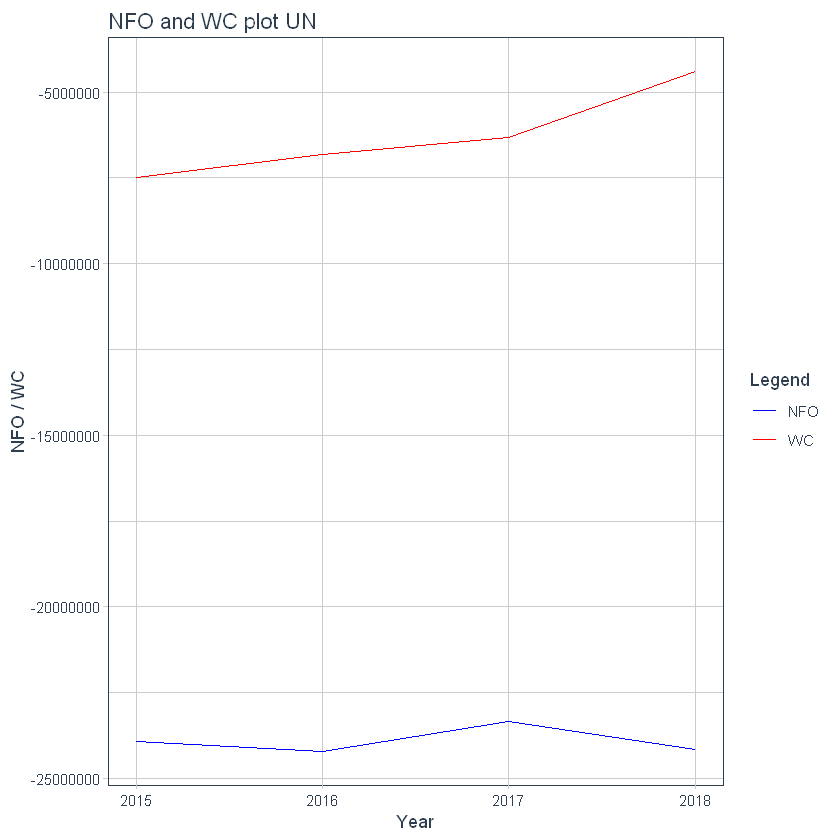

$GE


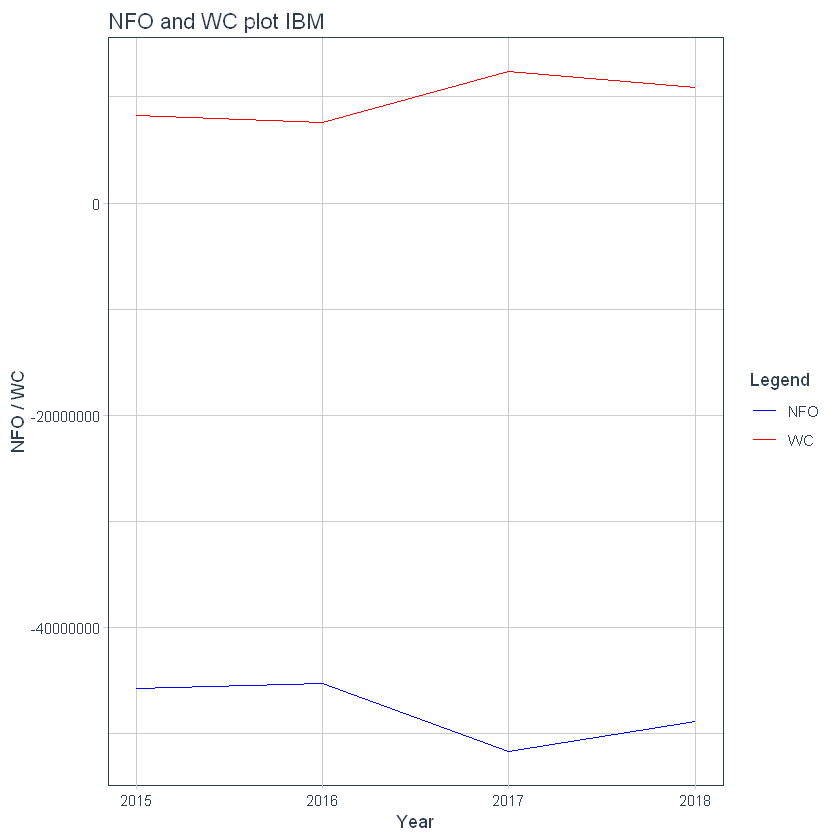

$F


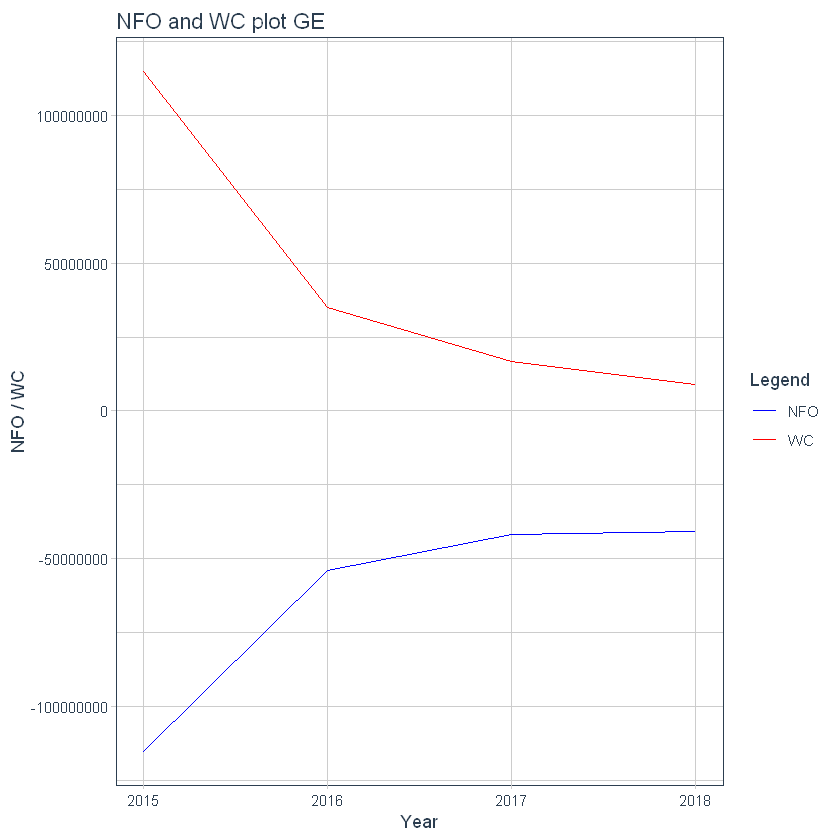

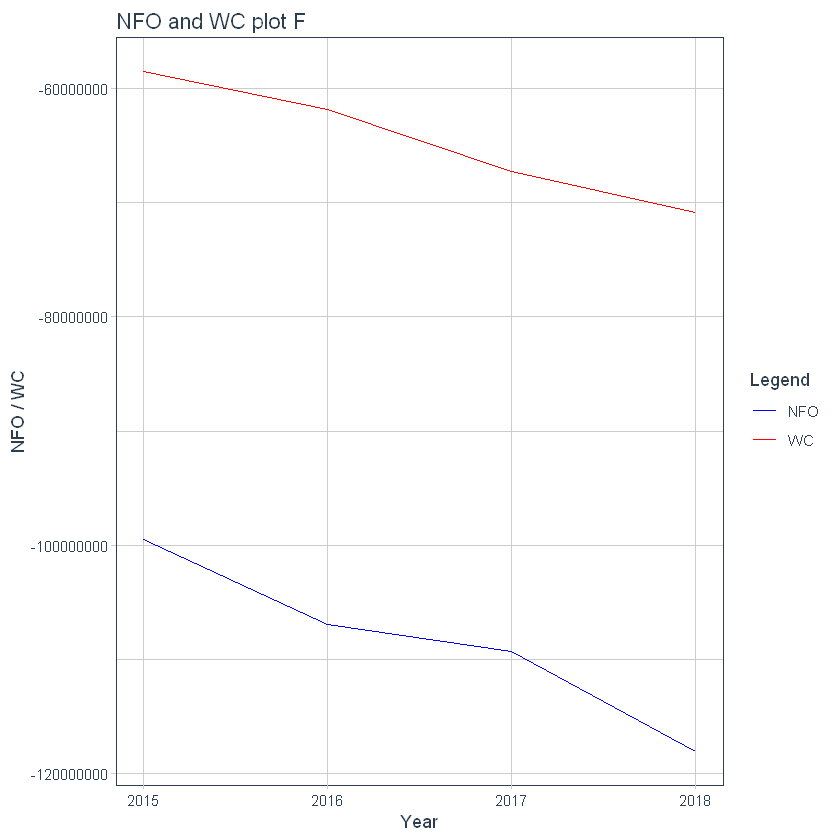

In [13]:
########## Plot the NFO & WC #############

symbol <- NULL
symbols <- unique(NFO_WCAnalysis$Ticker)

# Create the plots for NFO and WC for all symbols
plotList <- list()
for(symbol in symbols){
  plotList[[symbol]] <- ggplot(subset(NFO_WCAnalysis, Ticker %in% symbol)) +
    geom_line(aes(Date, NFO, group = Ticker, colour = "Blue")) +
    geom_line(aes(Date, WC, group = Ticker, colour = "Red")) +
    labs(title=paste0("NFO and WC plot ", symbol), x="Year", y="NFO / WC") +
    scale_color_manual(labels = c("NFO", "WC"), values = c("Blue", "Red")) +
    guides(color=guide_legend("Legend")) +
    theme_tq() +
    theme(legend.position = "right")
}


# Change the symbols to view the NFO WC plots
plotList[1]
plotList[2]
plotList[3]
plotList[4]

# Print the results to a PDF document
#pdf("PlotsNFO_WC.pdf", onefile = TRUE, paper = "USr") #Uncomment this if you want to save to .pdf
#plotList
#dev.off()

In [15]:
########## Collection Period, Days of Inventory and Days of Payable #############
# Create the plots for Collection Period, Days of Inventory and Days of Payable

mm <- melt(CashCycle, id = c('Ticker', 'Date'))
mm <- mm[mm$variable == "CollectionPeriod" | mm$variable == "DaysofInventory" | mm$variable == "DaysofPayable",]
mm$value <- with(mm, ifelse(variable == "DaysofPayable", -value, value))

head(mm)

Ticker,Date,variable,value
UN,2018,CollectionPeriod,34.52258
UN,2017,CollectionPeriod,28.56669
UN,2016,CollectionPeriod,26.68621
UN,2015,CollectionPeriod,23.40517
IBM,2018,CollectionPeriod,39.42079
IBM,2017,CollectionPeriod,47.87399


$UN


$IBM


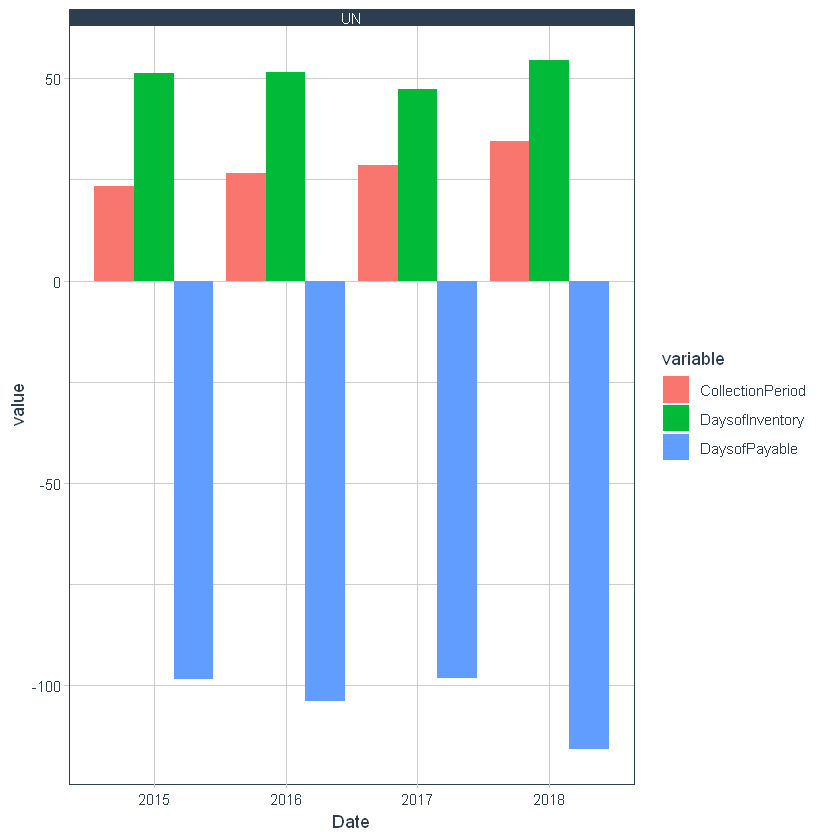

$GE


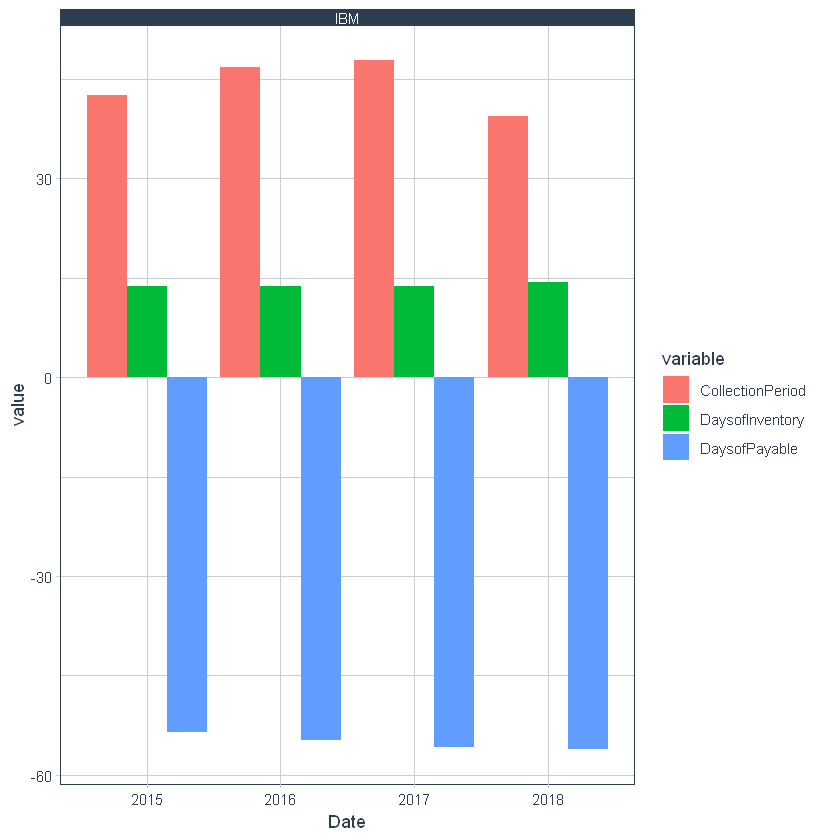

$F


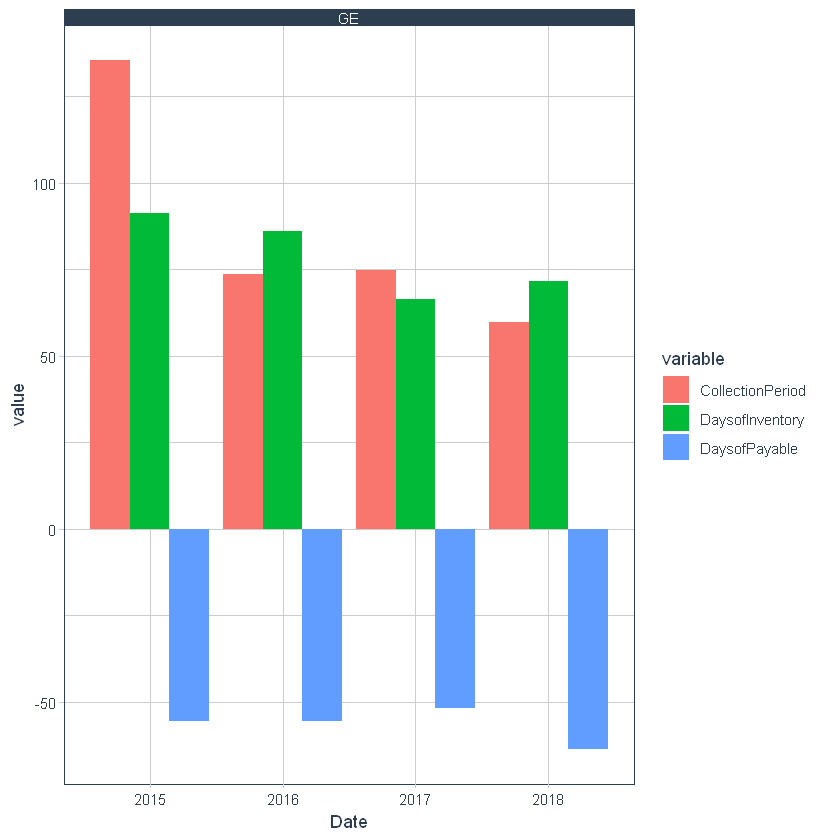

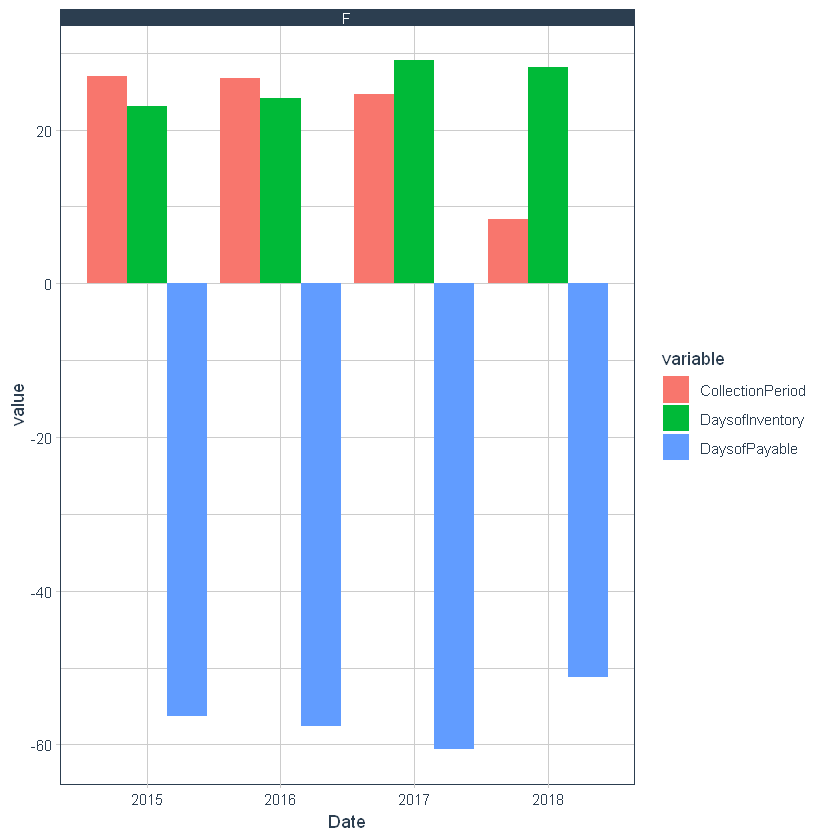

In [16]:
########## Plot the Collection Period, Days of Inventory and Days of Payable #############

symbol <- NULL
symbols <- unique(mm$Ticker)

plotListBar <- list()
for(symbol in symbols){
  plotListBar[[symbol]] <- ggplot(mm[mm$Ticker == symbol,], aes(Date, value,  fill = variable)) + facet_wrap(~ Ticker) +
    geom_bar(stat="identity", position = "dodge") +
    theme_tq() +
    theme(legend.position = "right")
}

plotListBar[1]
plotListBar[2]
plotListBar[3]
plotListBar[4]

# Print the results to a PDF document
#pdf("Plots_OperationalRatios.pdf", onefile = TRUE, paper = "USr") #Uncomment if you want to save to .pdf
#plotListBar
#dev.off()

In [ ]:
# library(openxlsx)
# if(devtools::find_rtools()) Sys.setenv(R_ZIPCMD= file.path(devtools:::get_rtools_path(),"zip"))
# write.xlsx(CashCycle, 'CashCycle.xlsx')
# write.xlsx(DuPontAnalysis, 'DuPontAnalysis.xlsx')
# write.xlsx(NFO_WCAnalysis, 'NFO_WCAnalysis.xlsx')
# write.xlsx(df, 'FinancialsAllCompanies.xlsx')